## Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (update 'your_dataset.csv' with your actual file name)
data = pd.read_csv('/content/Indian telecommunications market.csv')

In [4]:
# Display the first few rows of the dataset
data.head()

,Timestamp,1.Which region of India are you from?,2.Which type of location do you live in?,3.Which tech are you currently using?,4.Can you send an email with no attachments and just paragraphs of text instantly?,5.Are one-on-one video calls a smooth experience?,6.Do you experience delays in video conference calls?,7.How long does it take you to download a song of 4 minutes?,8.How much data do you use each month?,9.What do you usually do with your phone? (Multiple choices),...,14-Jio.How much are you paying for your mobile bill & WiFi services per month currently?,"15-Jio.If VI lowers its price for services to the same level as Jio, will you switch to VI?",16-Jio.Rate the service quality,13-Airtel.Why do you use your current network?,14-Airtel.How much are you paying for your mobile bill & WiFi services per month currently?,"15-Airtel.If VI lowers its price for services to the same level as Airtel, will you switch to VI?","16-Airtel.If VI provides higher quality services with a higher price as compared to Airtel, will you switch to VI?",17-Airtel.Rate the service quality,18.How much support do you think these companies are obtaining from the government?,19.Do you think the telecommunications market in India is tilting towards a monopoly?
0,10/28/2021 18:56:57,West,Urban,4G,Yes,Yes,No,Less than 1 min,1GB to 10GB,"Social Media and Instant messaging, Online Mee...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,Yes
1,10/28/2021 19:14:06,North,Urban,4G,Yes,Yes,Yes,Less than 1 min,10GB to 50GB,"Social Media and Instant messaging, Online Sho...",...,Rs. 1000-3000,Yes,10.0,NaN,NaN,NaN,NaN,NaN,8,Yes
2,10/28/2021 21:30:05,West,Urban,4G,No,Yes,No,1 min to 2 mins,10GB to 50GB,"Social Media and Instant messaging, Online Sho...",...,NaN,NaN,NaN,The only network that works in my bedroom,Rs. 1000-3000,Yes,Yes,7.0,8,Yes
3,10/28/2021 23:06:31,East,Urban,4G,Yes,Yes,No,1 min to 2 mins,10GB to 50GB,"Social Media and Instant messaging, Online Rea...",...,NaN,NaN,NaN,High quality,Less than Rs. 1000,No,Yes,7.0,7,No
4,10/29/2021 6:35:21,West,Urban,4G,Yes,No,No,Less than 1 min,More than 50GB,"Social Media and Instant messaging, Online Sho...",...,NaN,NaN,NaN,High quality,Rs. 1000-3000,Maybe,Maybe,10.0,9,Yes


# Step 1: Data Cleaning

In [5]:
# Check for missing values
print("\nMissing Values Summary:")
print(data.isnull().sum())


Missing Values Summary:
Timestamp                                                                                                              0
1.Which region of India are you from?                                                                                  0
2.Which type of location do you live in?                                                                               0
3.Which tech are you currently using?                                                                                  0
4.Can you send an email with no attachments and just paragraphs of text instantly?                                     0
5.Are one-on-one video calls a smooth experience?                                                                      0
6.Do you experience delays in video conference calls?                                                                  0
7.How long does it take you to download a song of 4 minutes?                                                           0
8.How m

In [6]:
# Handling missing values
# Replace or drop missing values depending on the context
# Example: Filling numeric columns with mean and categorical columns with mode
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:
        data[column].fillna(data[column].mean(), inplace=True)
    elif data[column].dtype == 'object':
        data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-6-a71ed9dc4c4d>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)
<ipython-input-6-a71ed9dc4c4d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [7]:
# Confirm missing values have been handled
print("\nMissing Values After Cleaning:")
print(data.isnull().sum())


Missing Values After Cleaning:
Timestamp                                                                                                             0
1.Which region of India are you from?                                                                                 0
2.Which type of location do you live in?                                                                              0
3.Which tech are you currently using?                                                                                 0
4.Can you send an email with no attachments and just paragraphs of text instantly?                                    0
5.Are one-on-one video calls a smooth experience?                                                                     0
6.Do you experience delays in video conference calls?                                                                 0
7.How long does it take you to download a song of 4 minutes?                                                          0
8.How mu

In [8]:
# Remove duplicate rows
print("\nNumber of duplicate rows removed:", data.duplicated().sum())
data = data.drop_duplicates()


Number of duplicate rows removed: 0


# Step 2: Data Exploration

In [9]:
# Basic statistics
print("\nDataset Summary:")
print(data.describe(include='all'))


Dataset Summary:
                  Timestamp 1.Which region of India are you from?  \
count                    50                                    50   
unique                   49                                     4   
top     11/22/2021 18:13:34                                  West   
freq                      2                                    23   
mean                    NaN                                   NaN   
std                     NaN                                   NaN   
min                     NaN                                   NaN   
25%                     NaN                                   NaN   
50%                     NaN                                   NaN   
75%                     NaN                                   NaN   
max                     NaN                                   NaN   

       2.Which type of location do you live in?  \
count                                        50   
unique                                        3   


In [10]:
# Data types and column information
print("\nData Types:")
print(data.info())


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 28 columns):
 #   Column                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                              --------------  -----  
 0   Timestamp                                                                                                           50 non-null     object 
 1   1.Which region of India are you from?                                                                               50 non-null     object 
 2   2.Which type of location do you live in?                                                                            50 non-null     object 
 3   3.Which tech are you currently using?                                                                               50 non-null     object 
 4   4.Can you

# Step 3: Data Visualization

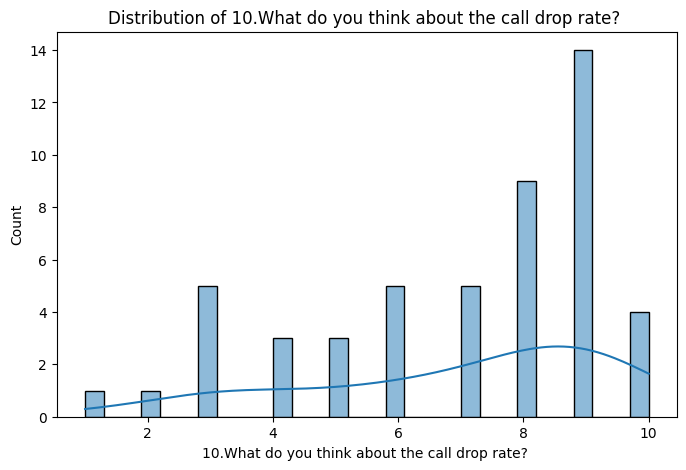

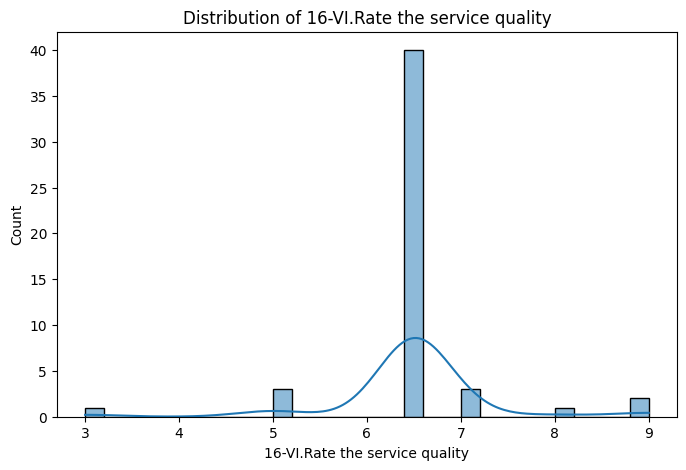

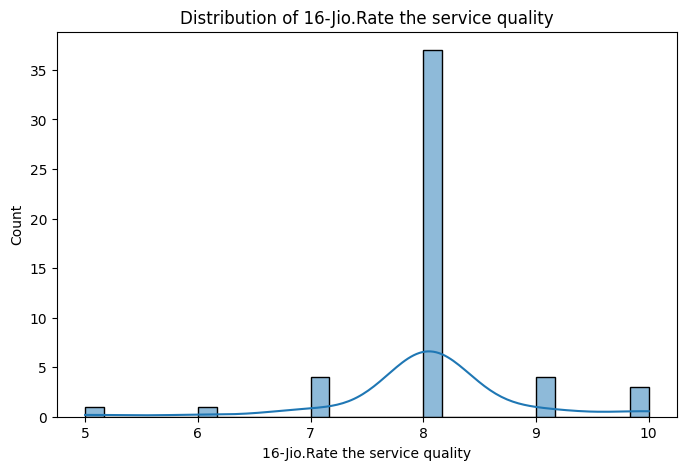

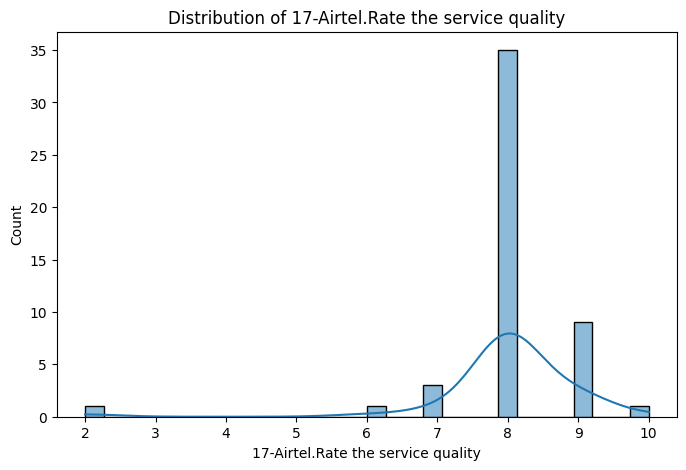

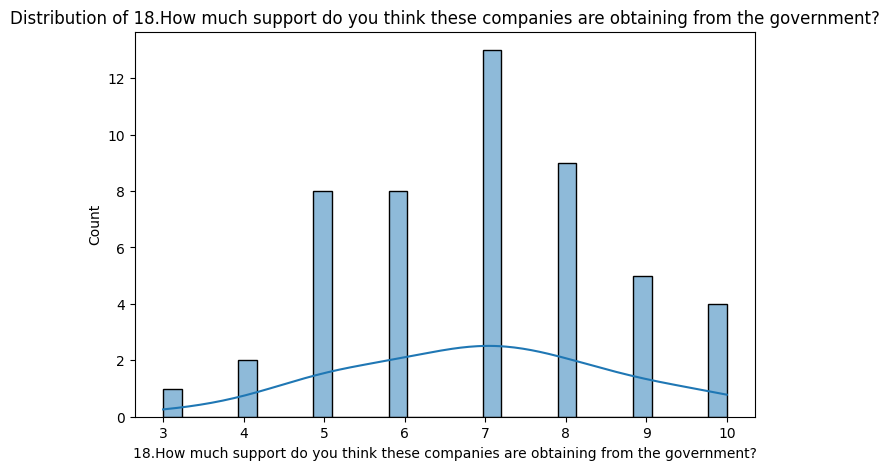

In [11]:
# Plot distribution of numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {column}")
    plt.show()

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


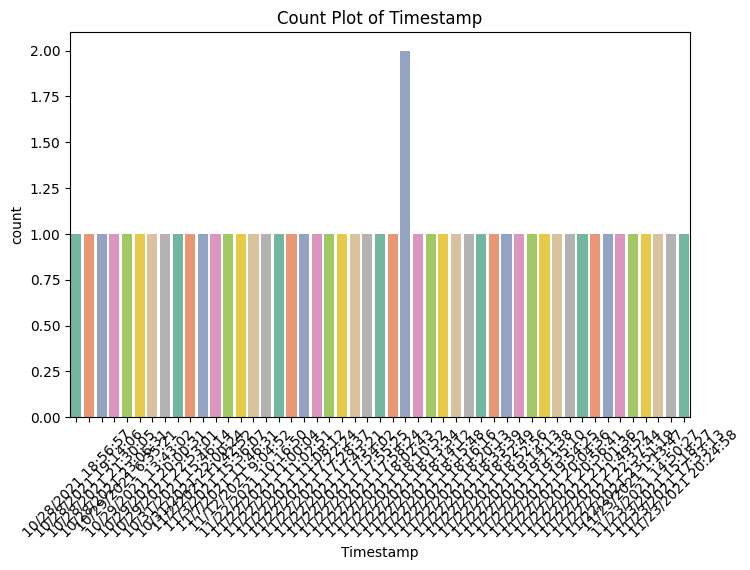

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


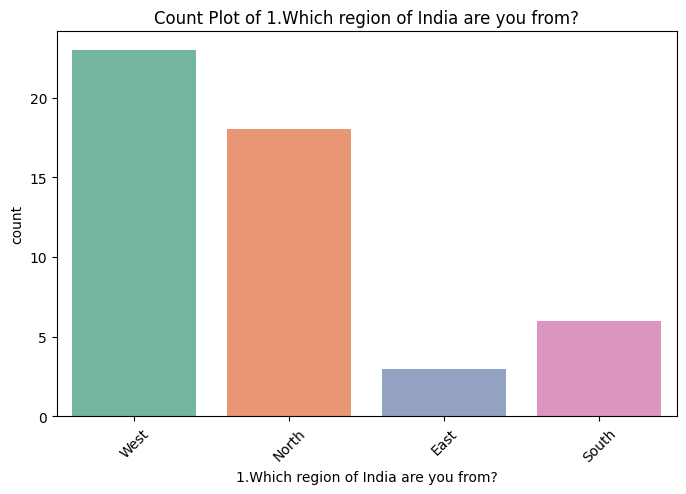

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


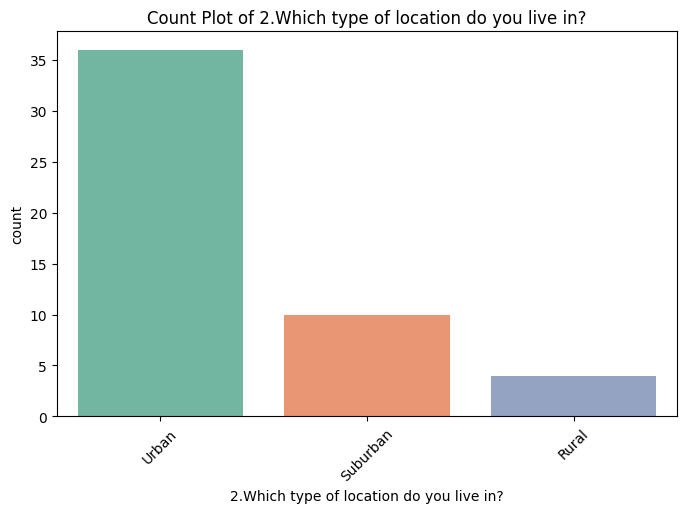

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


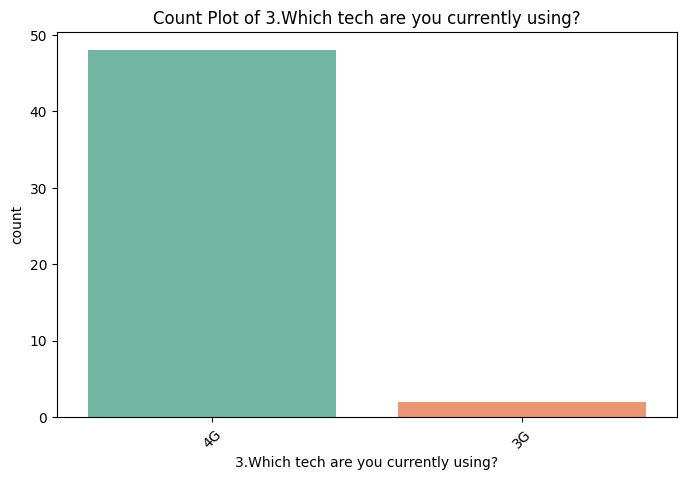

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


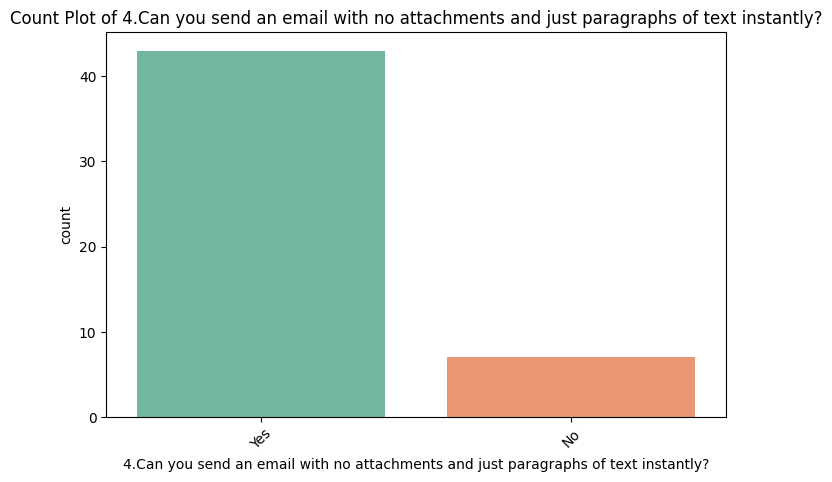

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


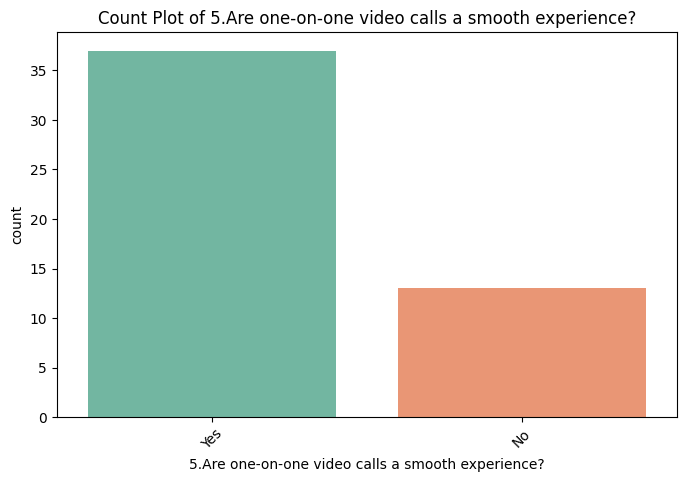

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


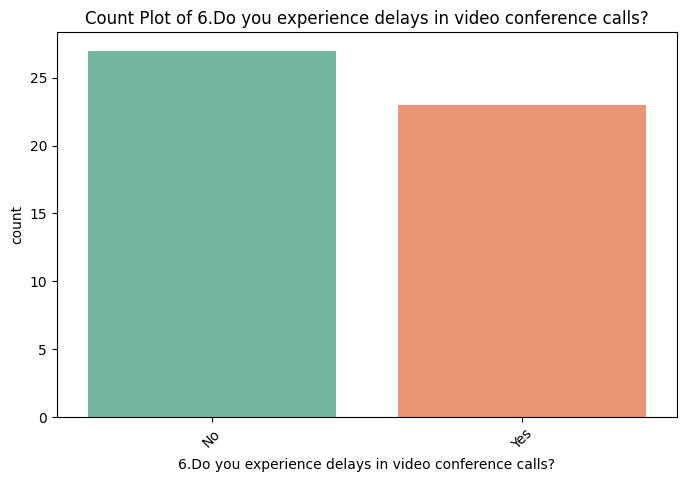

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


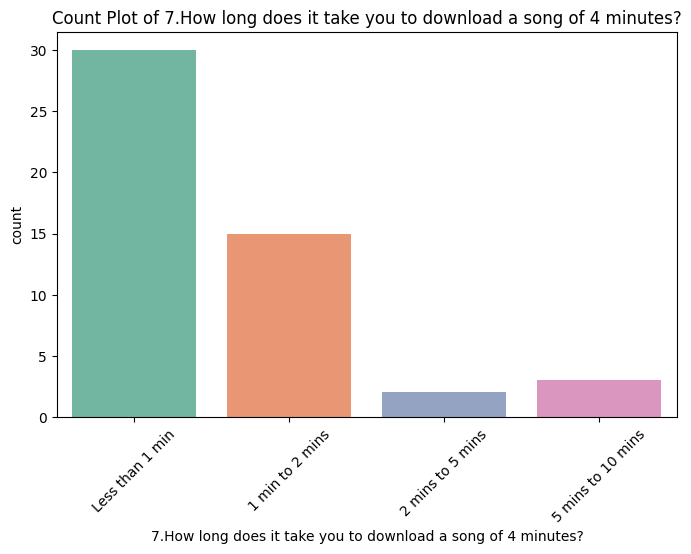

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


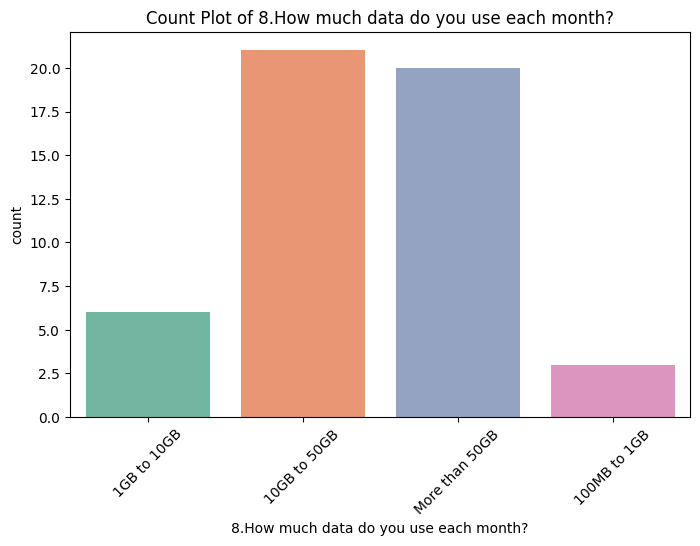

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


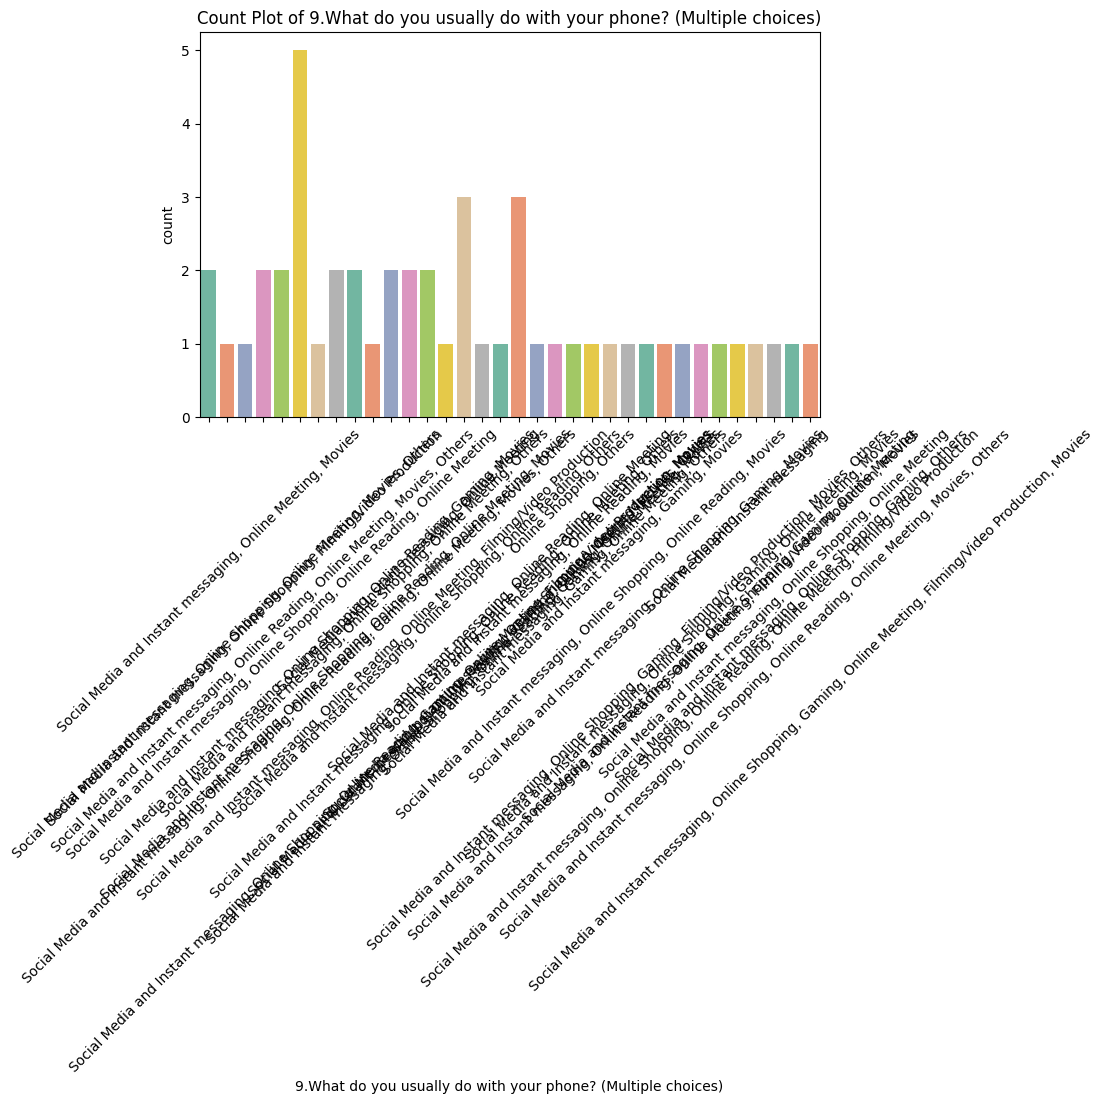

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


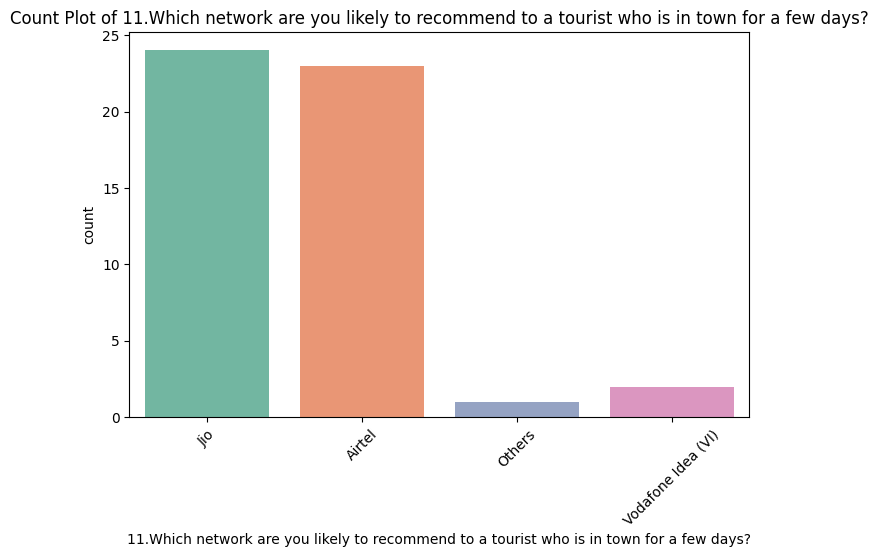

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


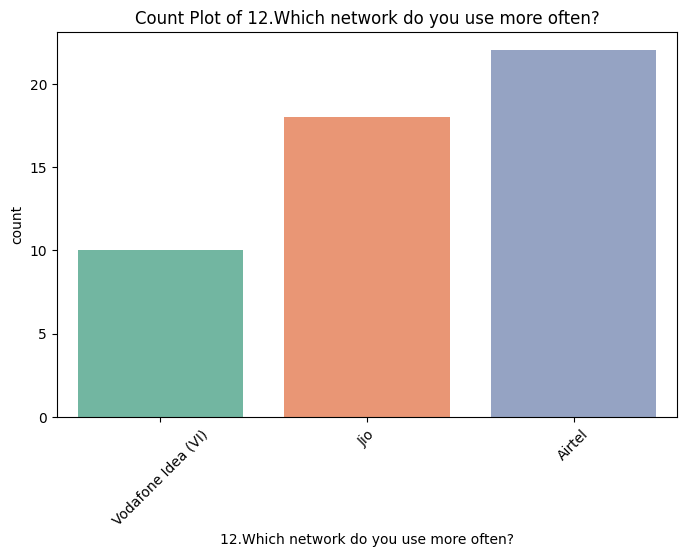

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


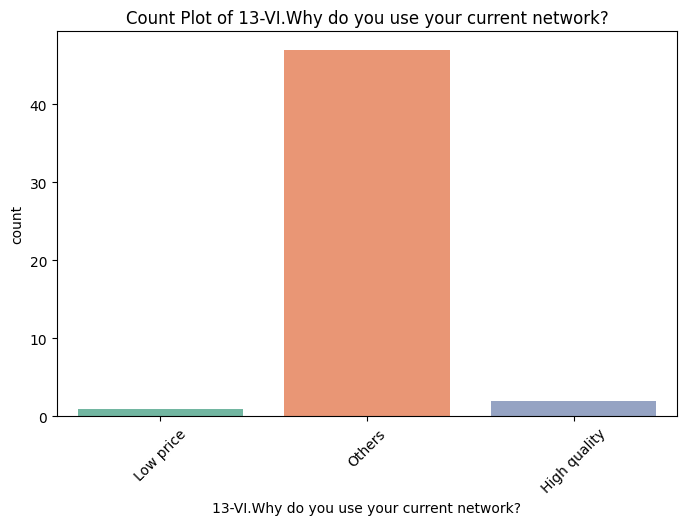

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


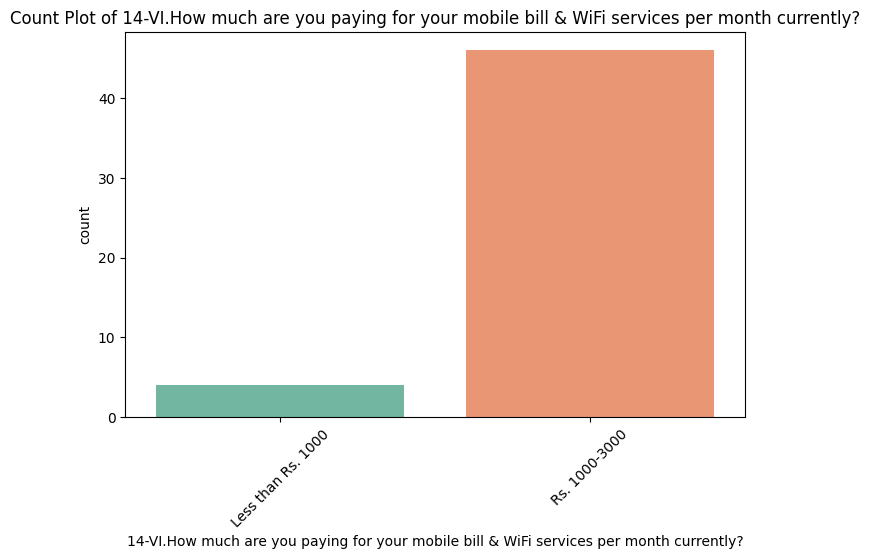

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


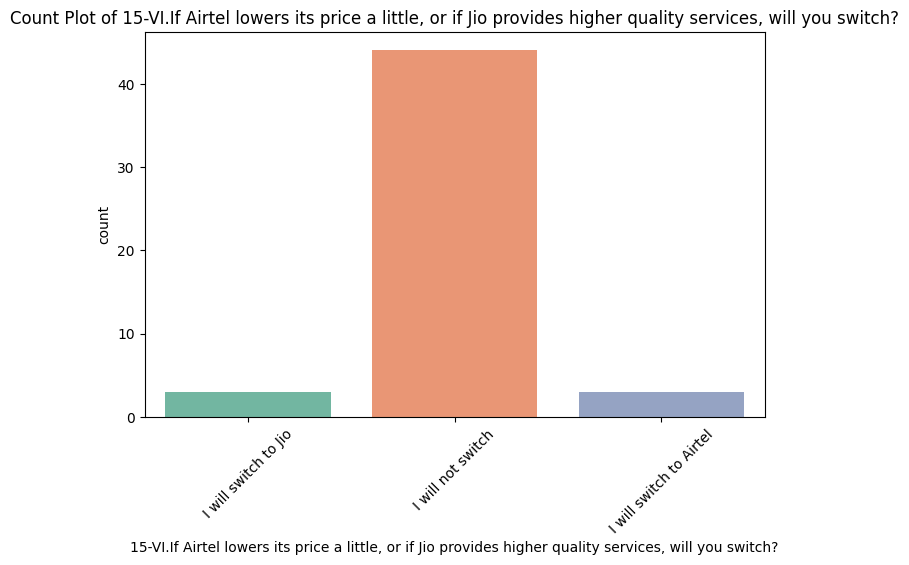

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


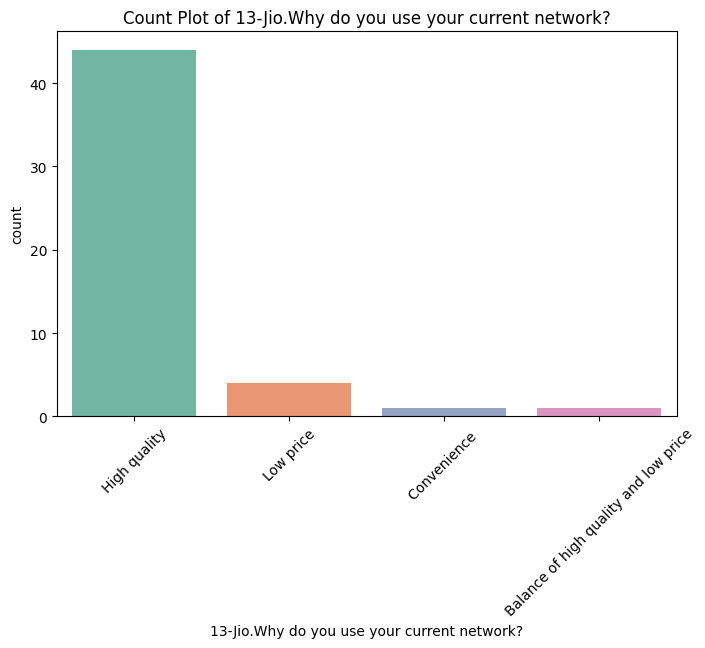

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


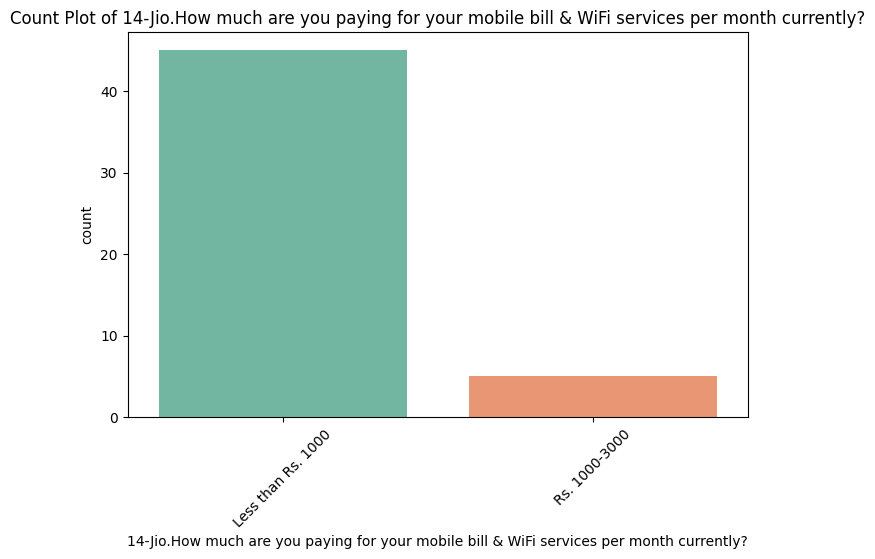

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


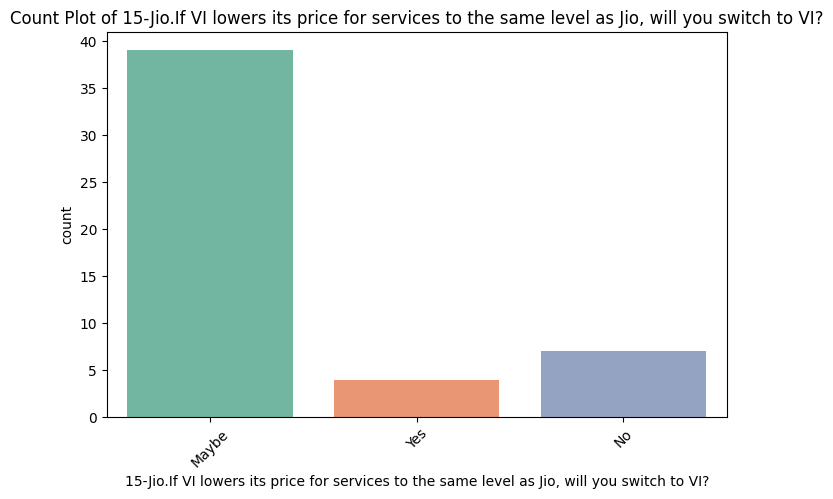

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


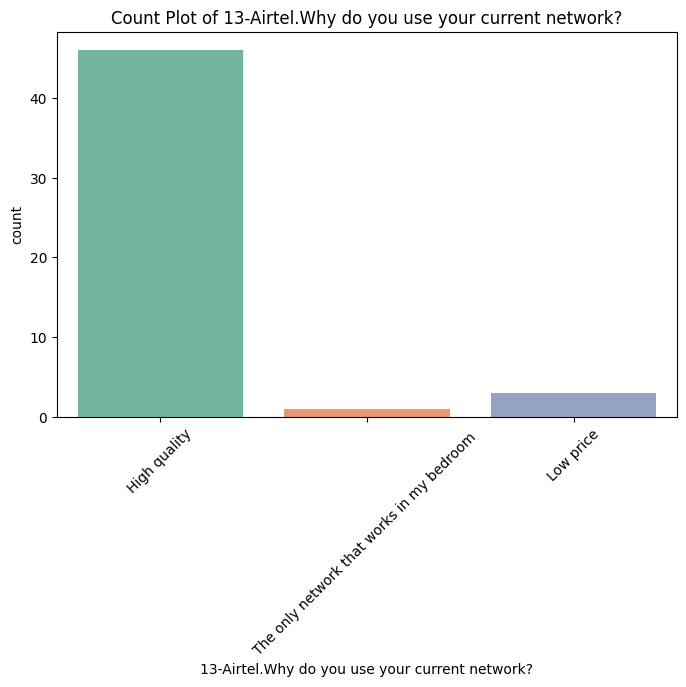

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


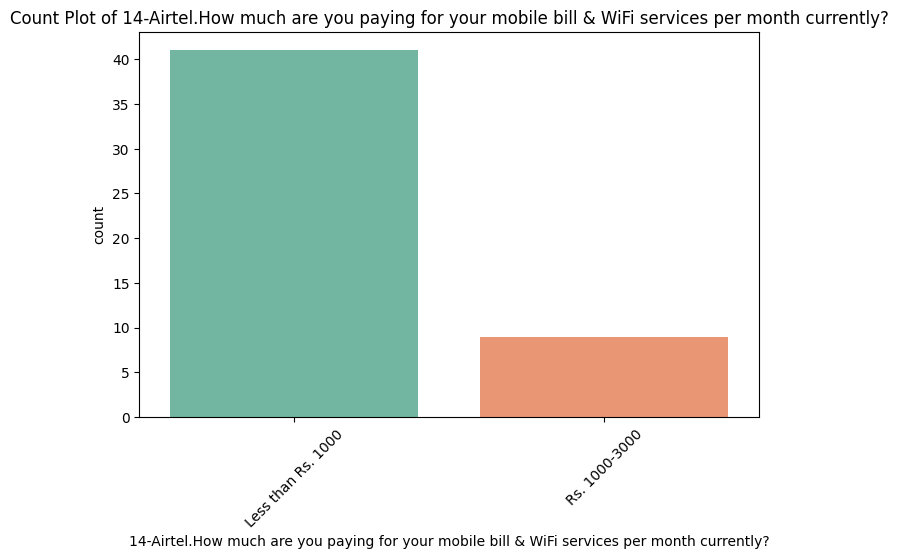

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


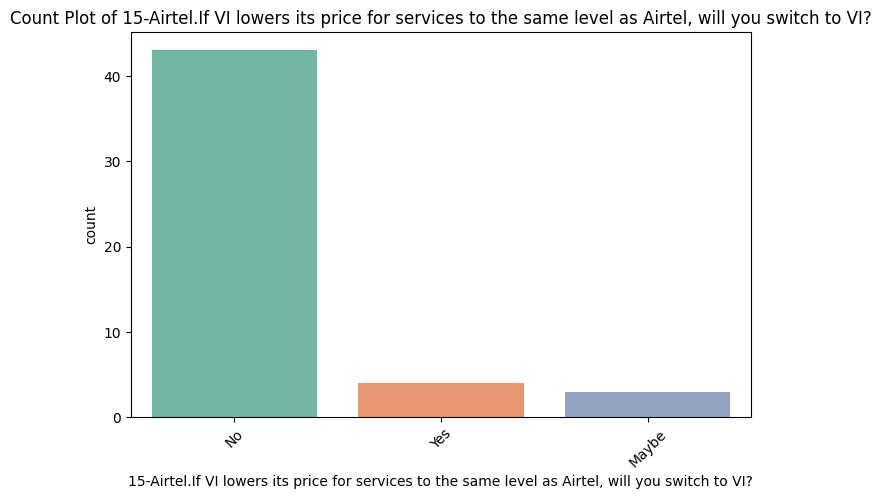

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


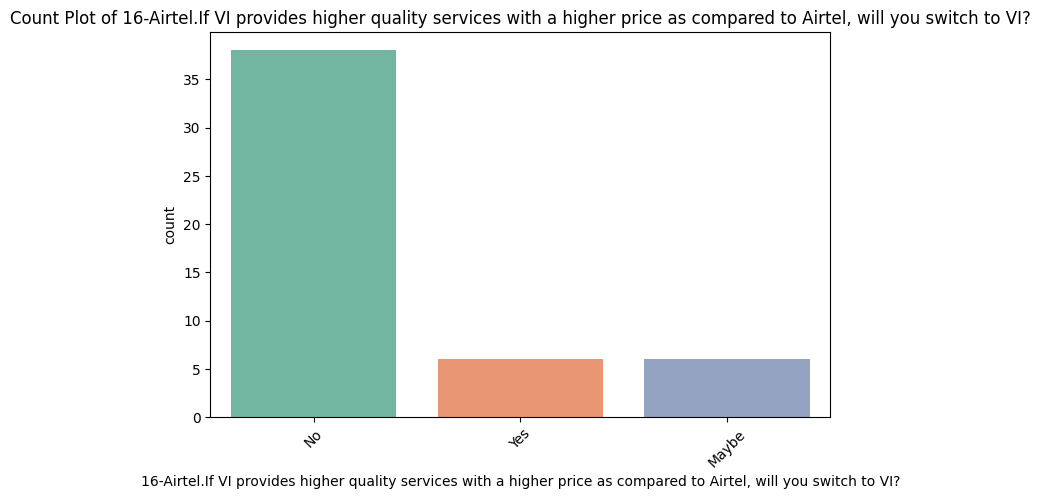

<ipython-input-12-16a52cdabad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


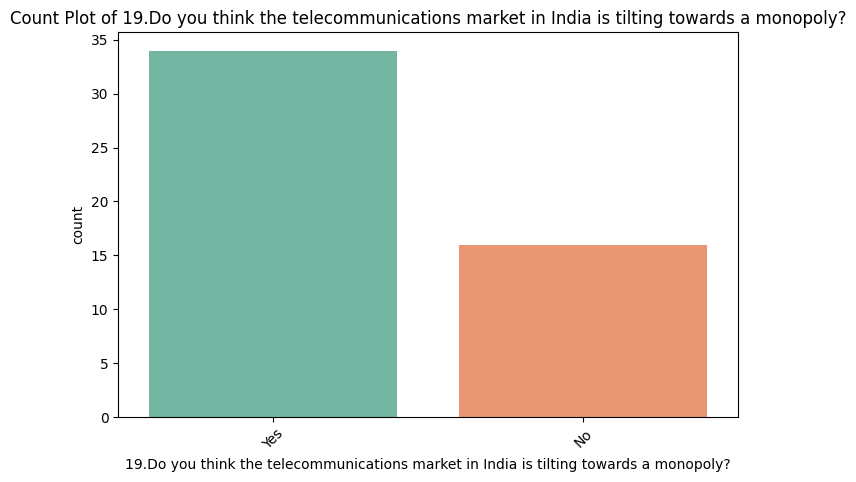

In [12]:
# Plot count plots for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f"Count Plot of {column}")
    plt.xticks(rotation=45)
    plt.show()

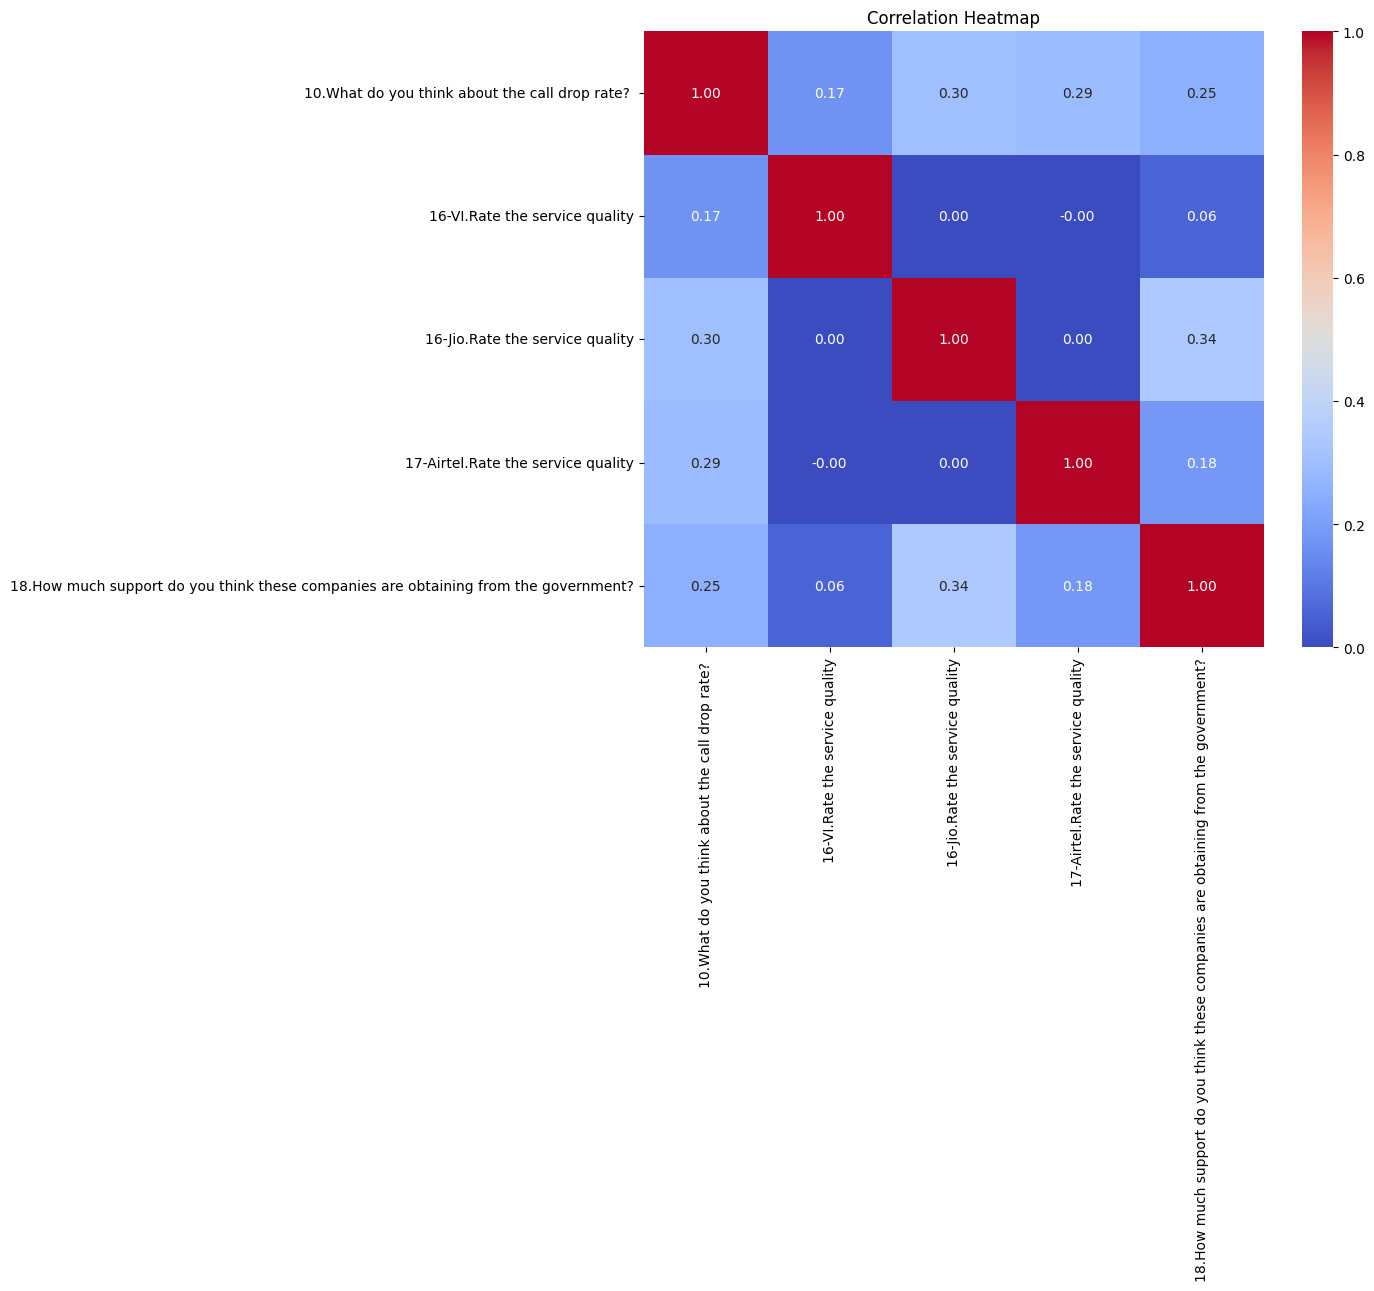

In [13]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
correlation_matrix = data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

<ipython-input-14-2e9c7c4fca18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], palette='Set3')


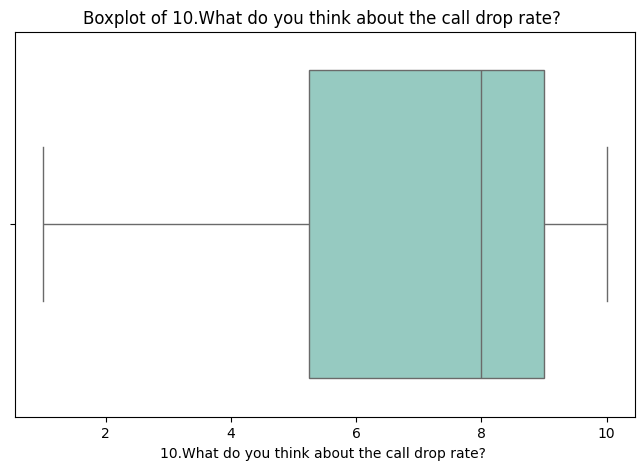

<ipython-input-14-2e9c7c4fca18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], palette='Set3')


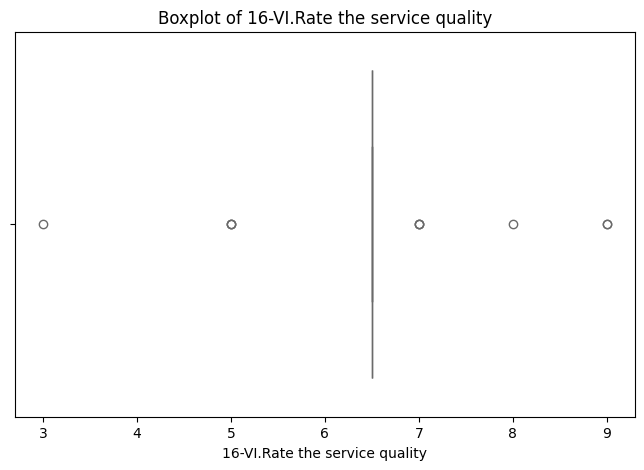

<ipython-input-14-2e9c7c4fca18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], palette='Set3')


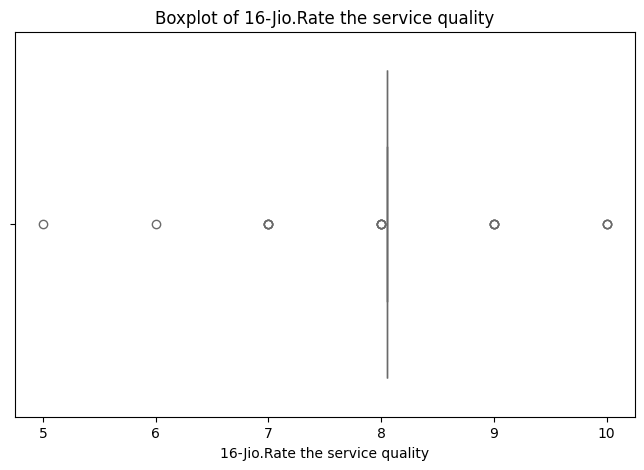

<ipython-input-14-2e9c7c4fca18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], palette='Set3')


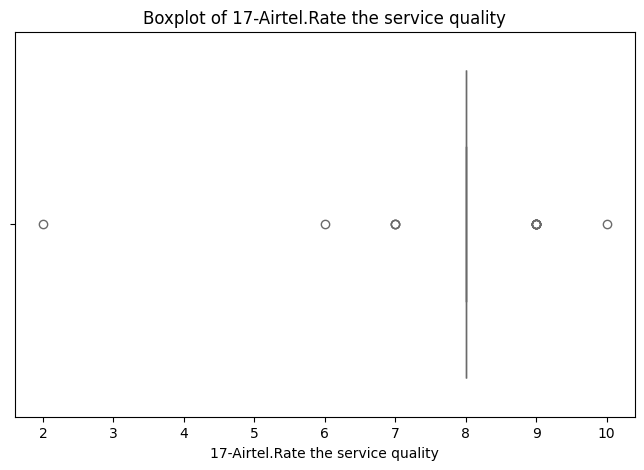

<ipython-input-14-2e9c7c4fca18>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data[column], palette='Set3')


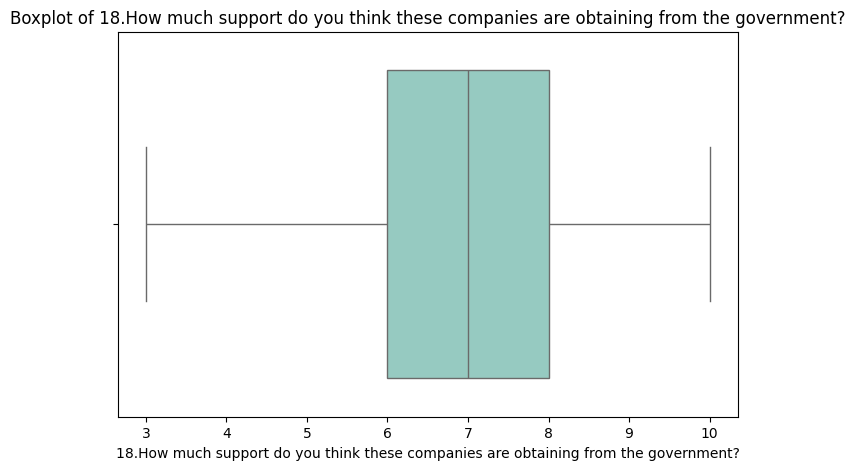

In [14]:
# Boxplots for outlier detection
for column in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[column], palette='Set3')
    plt.title(f"Boxplot of {column}")
    plt.show()

In [15]:
# Save cleaned data to a new CSV file
data.to_csv('cleaned_dataset.csv', index=False)
print("\nCleaned dataset saved as 'cleaned_dataset.csv'.")


Cleaned dataset saved as 'cleaned_dataset.csv'.
